In [1]:
from src.dlc_practical_prologue import generate_pair_sets
from src.utils import load_class_data, load_target_data, load_all_data
from src.models import *
from src.trainer import Trainer
import matplotlib.pyplot as plt
import numpy as np

# Load data

In [2]:
# Load data inside CV

# Train / Test

## Params

In [3]:
nb_epochs = 25
n_cv = 5
n_cv_weight = 5

## Hyperparam opt the weight 
- Can skip and use result if using same architecture

In [4]:
weights = np.linspace(0.1, 1, 10)

In [5]:
weight_test_accuracies = np.zeros((n_cv_weight, len(weights)))

In [6]:
def hyperparam_opt(weights, n_cv_weight=5):
    for j, weight in enumerate(weights): 
    # 5 fold cross validate here 
        for i in range(n_cv_weight):
            siamese_le_net = Siamese(le_net, 
                                     target=tail_net, 
                                     weight_aux=weight)
            trainer = Trainer(nb_epochs=nb_epochs)
            trainer.fit(siamese_le_net, dl_train_all, dl_val_all, verbose=False)
            acc_test = trainer.test(siamese_le_net, dl_test_all, test_verbose=True, return_acc=True)
            weight_test_accuracies[i,j] = acc_test
    avg_weight_test_accuracies = np.mean(weight_test_accuracies, axis=0)
    best_weight = weights[np.argmax(avg_weight_test_accuracies)]
    return best_weight

In [7]:
#best_weight = hyperparam_opt(weights, n_cv_weight=5)

In [8]:
# keep best weight

In [9]:
best_weight = 0.6

In [10]:
weight_aux = best_weight

In [11]:
test_accuracies = []
train_losses = []
train_accuracies = []
validation_accuracies = []

In [12]:
for i in range(n_cv):
    dl_train_all, dl_val_all, dl_test_all = load_all_data(normalize=True)
    le_net = LeNet()
    tail_net = TailLinear()
    siamese_le_net = Siamese(le_net, 
                            target=tail_net, 
                            weight_aux=weight_aux)
    trainer = Trainer(nb_epochs=nb_epochs)
    loss_train, acc_train, acc_val = trainer.fit(siamese_le_net, dl_train_all, dl_val_all, verbose=True)
    train_losses.append(loss_train)
    train_accuracies.append(acc_train)
    validation_accuracies.append(acc_val)
    
    acc_test = trainer.test(siamese_le_net, dl_test_all, test_verbose=True, return_acc=True)
    test_accuracies.append(acc_test)

# Epoch 1/25:	 loss=1.32	 loss_val=0.68	 acc_val=58.93
# Epoch 2/25:	 loss=1.6	 loss_val=0.64	 acc_val=62.05
# Epoch 3/25:	 loss=1.48	 loss_val=0.62	 acc_val=75.0
# Epoch 4/25:	 loss=1.18	 loss_val=0.52	 acc_val=80.8
# Epoch 5/25:	 loss=1.16	 loss_val=0.52	 acc_val=80.8
# Epoch 6/25:	 loss=1.11	 loss_val=0.52	 acc_val=82.14
# Epoch 7/25:	 loss=1.08	 loss_val=0.44	 acc_val=82.59
# Epoch 8/25:	 loss=1.05	 loss_val=0.29	 acc_val=92.41
# Epoch 9/25:	 loss=0.78	 loss_val=0.31	 acc_val=92.41
# Epoch 10/25:	 loss=0.98	 loss_val=0.21	 acc_val=93.75
# Epoch 11/25:	 loss=0.87	 loss_val=0.25	 acc_val=92.86
# Epoch 12/25:	 loss=1.0	 loss_val=0.21	 acc_val=95.09
# Epoch 13/25:	 loss=1.12	 loss_val=0.17	 acc_val=95.09
# Epoch 14/25:	 loss=1.07	 loss_val=0.2	 acc_val=95.54
# Epoch 15/25:	 loss=0.7	 loss_val=0.33	 acc_val=90.62
# Epoch 16/25:	 loss=0.97	 loss_val=0.32	 acc_val=89.73
# Epoch 17/25:	 loss=0.66	 loss_val=0.31	 acc_val=91.07
# Epoch 18/25:	 loss=0.86	 loss_val=0.28	 acc_val=92.41
# Epoch 

In [13]:
avg_test_acc = np.mean(test_accuracies)
print('avg test acc', avg_test_acc)
stdev_test_acc = np.std(test_accuracies)
print('stdev test acc', stdev_test_acc)

avg test acc 94.96
stdev test acc 1.4549226783578584


In [14]:
import numpy as np 
train_losses = np.mean(np.array(train_losses), axis=0)
train_accuracies = np.mean(np.array(train_accuracies), axis=0)
validation_accuracies = np.mean(np.array(validation_accuracies), axis=0)

In [15]:
from src.utils import plot_training_epochs

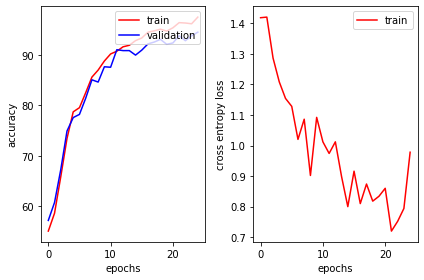

In [16]:
plt = plot_training_epochs(nb_epochs, train_losses, train_accuracies, validation_accuracies)